In [1]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from PIL import Image
import os
from tifffile import imread
import matplotlib.pyplot as plt
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from plot_utils import singleplot, plotXY, doubleplot
from GaussFit import StripFit, Linescan, ShiftFit,FinalShiftFit
from HoughLine import show_hough_linetransform, show_ransac_points_line, show_plot, Correlation_plot,show_intensity_plot, Peak_Data
from bokeh.models import Label
from bokeh.plotting import figure, show, output_notebook
from IPython.display import clear_output
from bokeh.models import Range1d
import csv
from GaussFit import MakePath

/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed

In [2]:
targetdir = '/Users/aimachine/Documents/Oz-linescan/TestLineScan/'

Membraneimage = '/Users/aimachine/Documents/Oz-linescan/TestLineScan/Membrane.tif'

Actinimage = '/Users/aimachine/Documents/Oz-linescan/TestLineScan/Actin.tif'



#Enter time unit in seconds
Time_unit = 1
#Enter pixel to micrometer conversion
Xcalibration = 0.1032
#Enter the number of pixels to be included in the fit
Fitaround= 8


#Symmetric psf as input (micrometers)
psf = 0.17

showaftertime = 100
inisigmaguess =  psf
#Size of linescan
skip = 50
singleblock = 40 

#Number of segments
numsegments = 10
id = []
for i in range(0, numsegments):
    id.append(i)
    
MakePath(targetdir)    
save_dir = targetdir + 'ls_data'    
MakePath(save_dir)


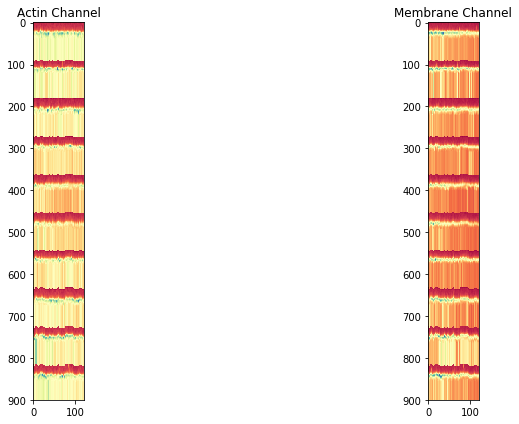

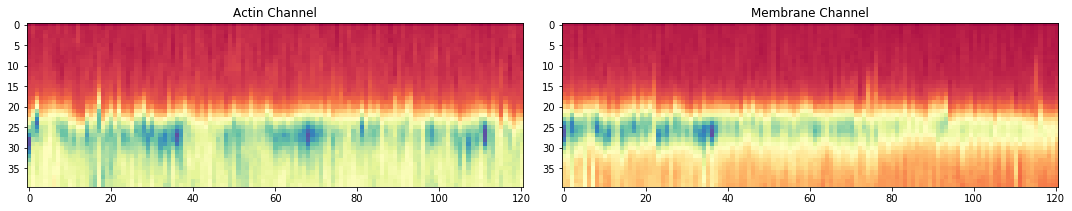

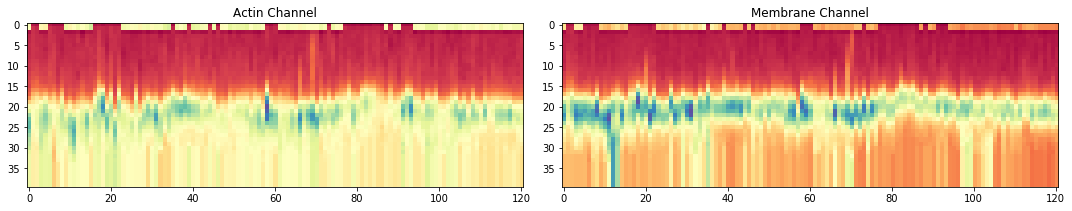

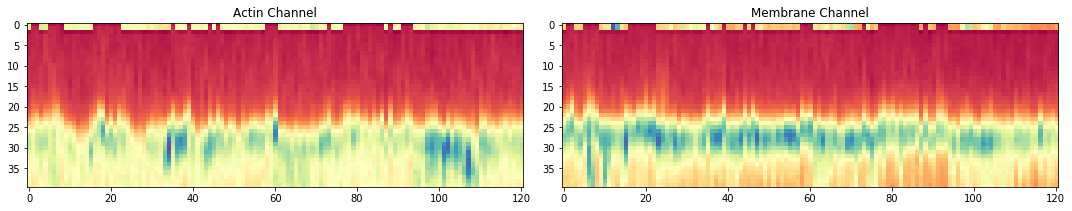

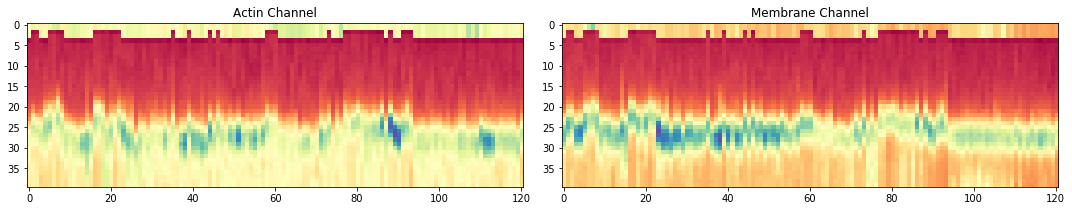

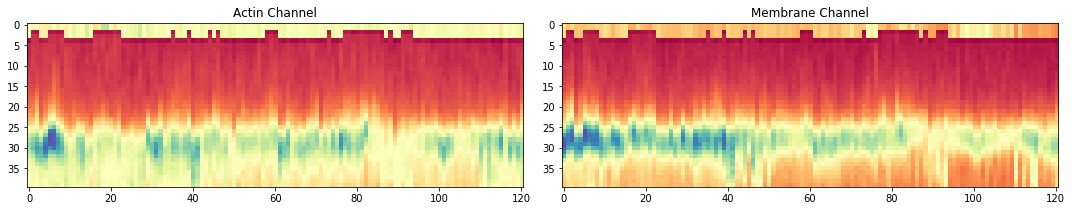

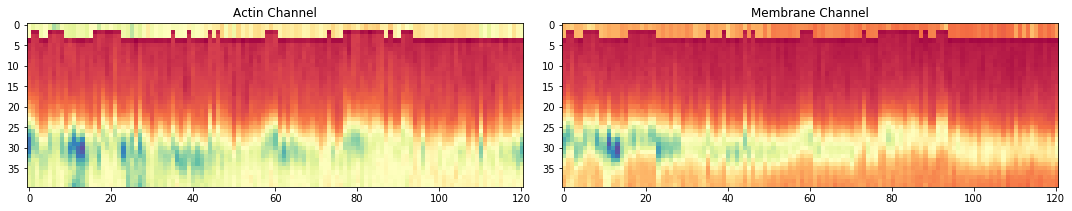

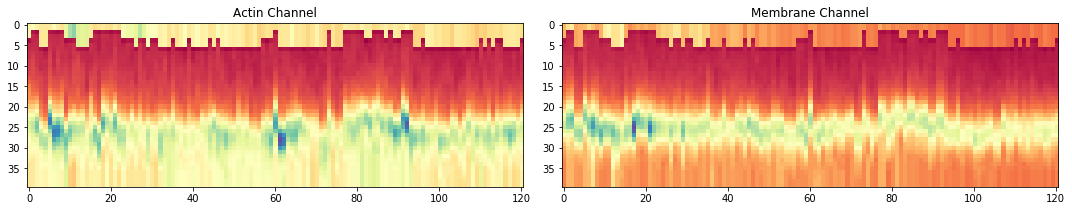

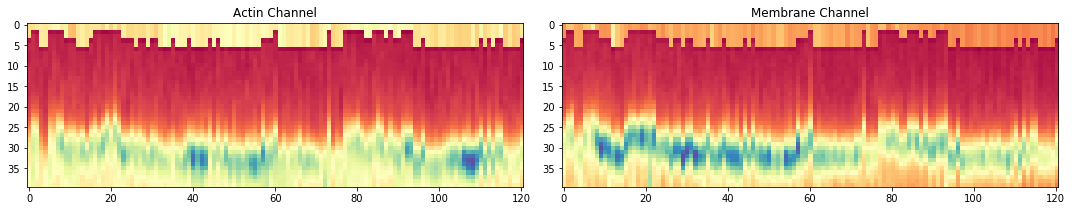

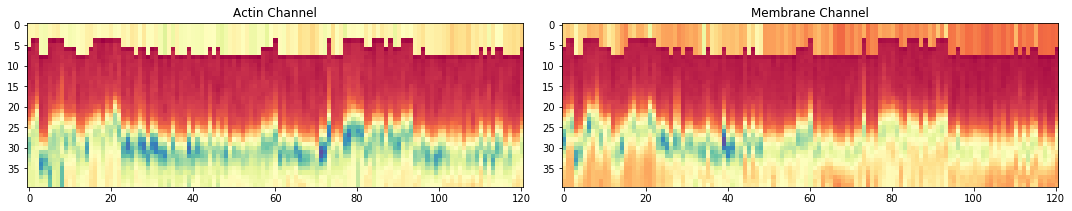

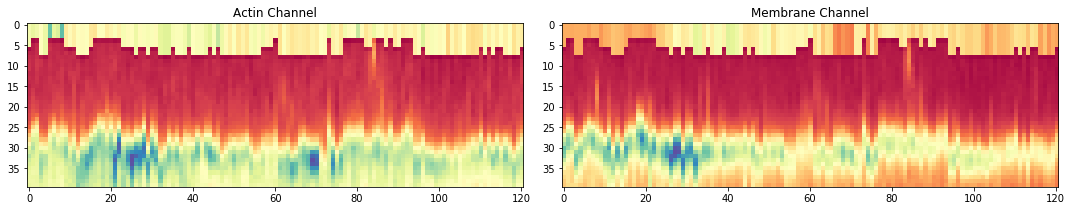

In [3]:
Actin = imread(Actinimage)
Membrane = imread(Membraneimage)

doubleplot(Actin, Membrane, 'Actin Channel', 'Membrane Channel')
blockimageActin = []
blockimageMembrane = []

i = 0
while i < Actin.shape[0]:
       
   blockActin = Actin[i:i + singleblock,:]#/np.amax(Actin[i:i + singleblock,:], 0)
   blockMembrane = Membrane[i:i + singleblock,:]#/np.amax(Membrane[i:i + singleblock,:],0)
   
   blockimageActin.append(blockActin)
   blockimageMembrane.append(blockMembrane)
   doubleplot(blockActin, blockMembrane, 'Actin Channel', 'Membrane Channel')
   i = i + singleblock + skip 

halflength = int(len(blockimageActin)/2)
otherhalf = len(blockimageActin) - halflength
totallength = len(blockimageActin)


block id 1


/Users/aimachine/PyImage/utils/GaussFit.py:596: RuntimeWarning: invalid value encountered in true_divide
  m_left = (self.i[self.left_index_right] - self.i[self.left_index_left]) /  (self.x[self.left_index_right] - self.x[self.left_index_left])
/Users/aimachine/PyImage/utils/GaussFit.py:612: RuntimeWarning: invalid value encountered in true_divide
  m_right = (self.i[self.right_index_right] - self.i[self.right_index_left]) / (self.x[self.right_index_right] - self.x[self.right_index_left])


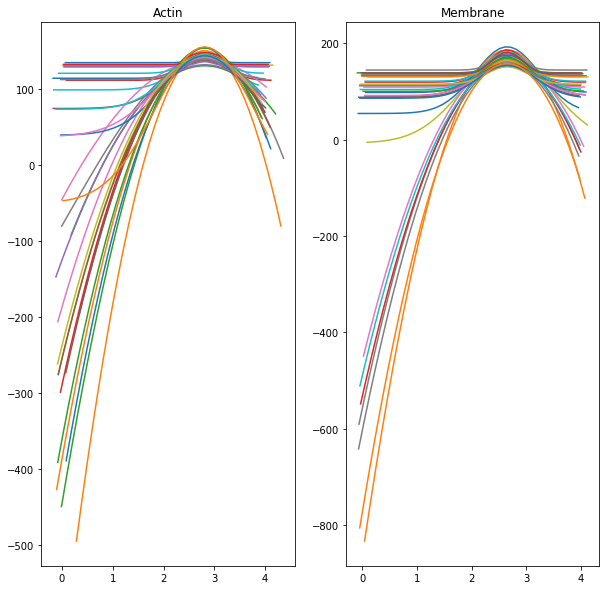

/Users/aimachine/PyImage/utils/GaussFit.py:596: RuntimeWarning: invalid value encountered in double_scalars
  m_left = (self.i[self.left_index_right] - self.i[self.left_index_left]) /  (self.x[self.left_index_right] - self.x[self.left_index_left])


Membrane Fit: (Amp, Sigma, PeakPos, C) [ 52.01110985   0.40183242   2.64852763 115.18193128]
Actin Fit: [ 44.35647274   0.50796285   2.80726544 107.33907498]


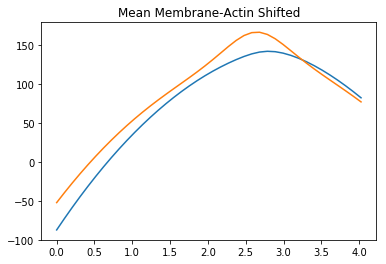

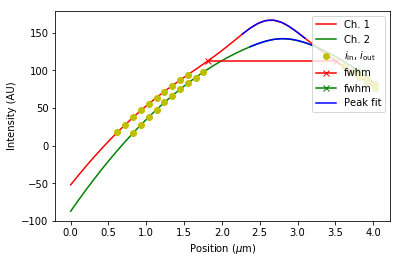

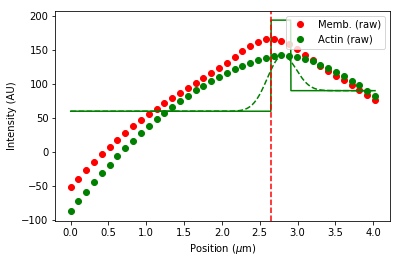

Thickness (nm), center cortex , cortical actin intensity (from fit) 260.7282063441534 2.778891736054912 194.07449918839288


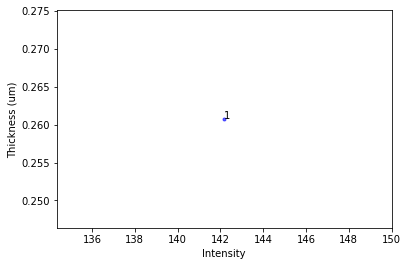

Thickness (min) 260.7282063441534 nm
Thickness (median) 260.7282063441534 nm
Thickness (max) 260.7282063441534 nm
block id 2


/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


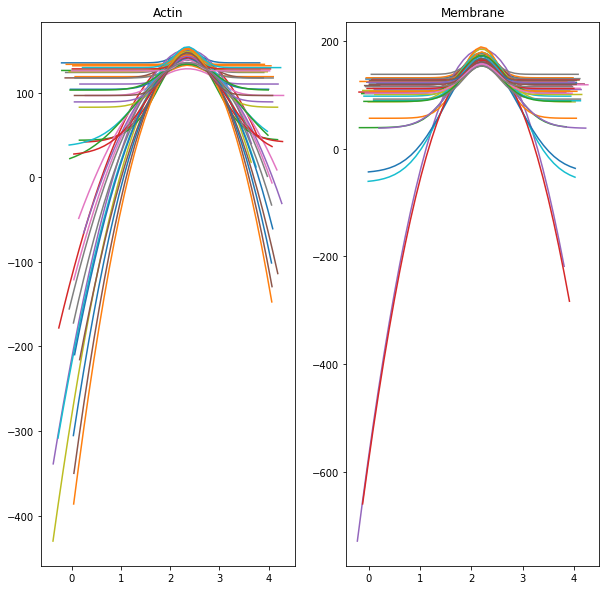

/Users/aimachine/PyImage/utils/GaussFit.py:612: RuntimeWarning: invalid value encountered in double_scalars
  m_right = (self.i[self.right_index_right] - self.i[self.right_index_left]) / (self.x[self.right_index_right] - self.x[self.right_index_left])


Membrane Fit: (Amp, Sigma, PeakPos, C) [ 57.17412907   0.36905973   2.20437923 104.2704229 ]
Actin Fit: [ 41.18142126   0.45520862   2.33167839 104.47533008]


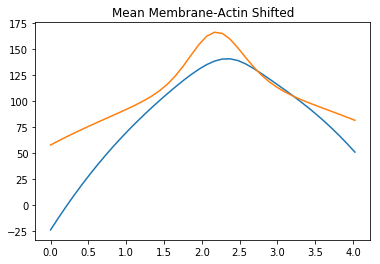

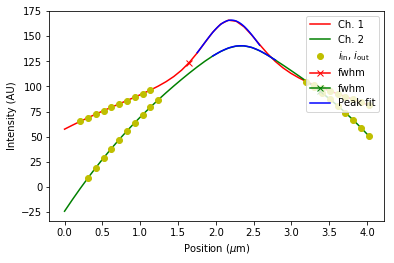

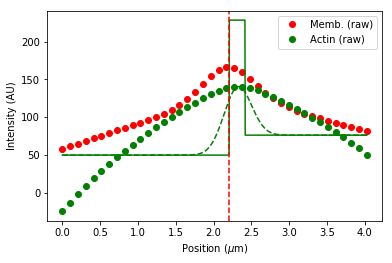

Thickness (nm), center cortex , cortical actin intensity (from fit) 210.7220103506826 2.309740233872255 228.4837888276656


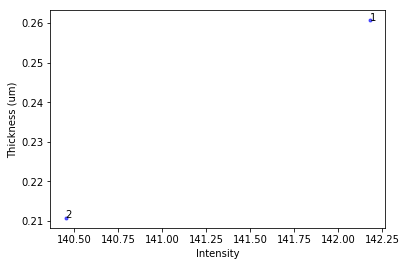

Thickness (min) 210.7220103506826 nm
Thickness (median) 235.72510834741803 nm
Thickness (max) 260.7282063441534 nm
block id 3


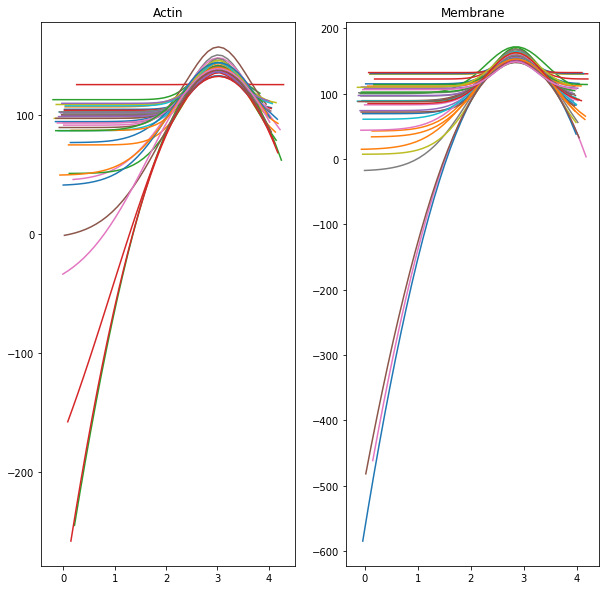

/Users/aimachine/PyImage/utils/GaussFit.py:672: RuntimeWarning: invalid value encountered in log
  (self.actin.i_in - i_c_start  ))))


Membrane Fit: (Amp, Sigma, PeakPos, C) [91.44949475  0.5280069   2.86000484 88.76002268]
Actin Fit: [56.80246615  0.53911763  3.0218599  97.23293774]


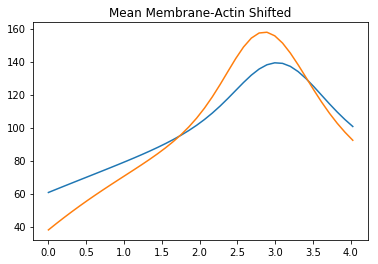

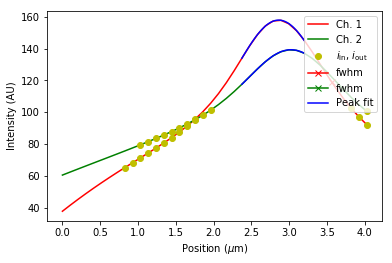

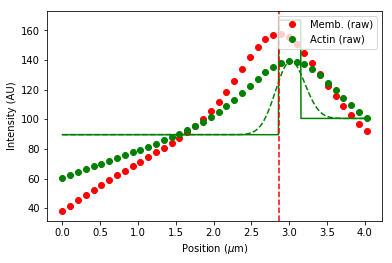

Thickness (nm), center cortex , cortical actin intensity (from fit) 293.61356537608003 3.006811623902475 167.00849190364966


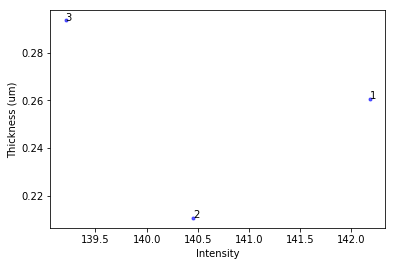

Thickness (min) 210.7220103506826 nm
Thickness (median) 260.7282063441534 nm
Thickness (max) 293.61356537608003 nm
block id 4


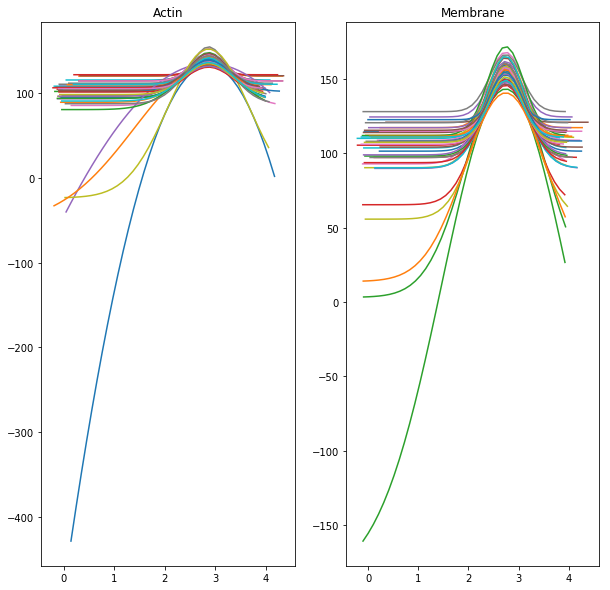

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 44.62429742   0.39296169   2.74794391 106.5405247 ]
Actin Fit: [55.25851337  0.51863899  2.86321289 94.39704966]


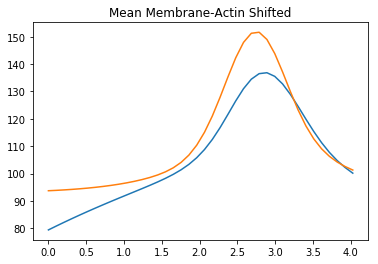

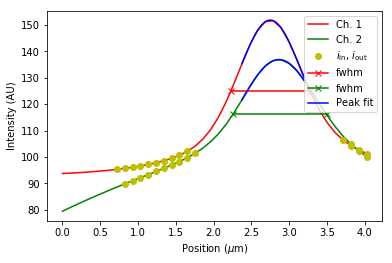

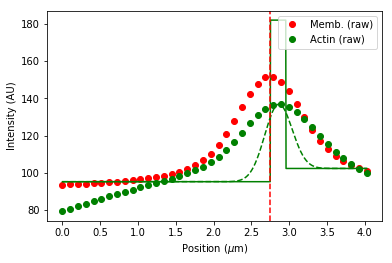

Thickness (nm), center cortex , cortical actin intensity (from fit) 206.63898280773466 2.851263398949935 181.98312153153756


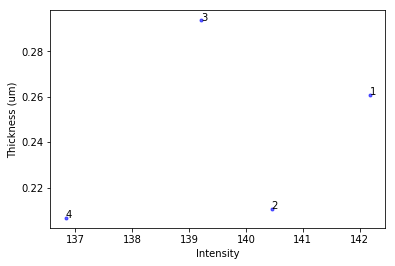

Thickness (min) 206.63898280773466 nm
Thickness (median) 235.72510834741803 nm
Thickness (max) 293.61356537608003 nm
block id 5


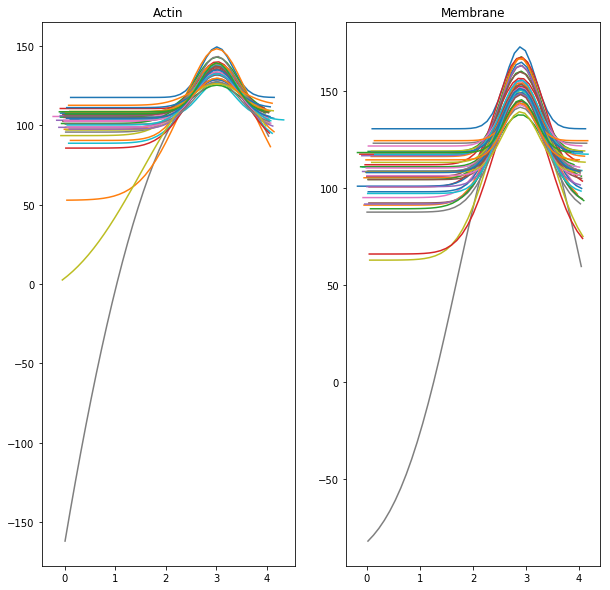

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 44.52238985   0.39984963   2.8973008  107.96123871]
Actin Fit: [ 33.37130217   0.44860409   3.00613818 104.18680963]


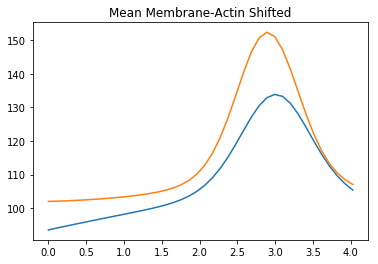

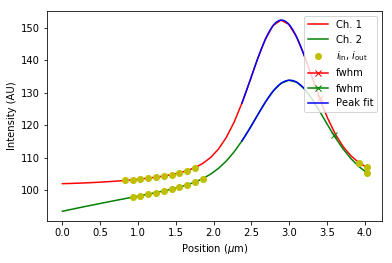

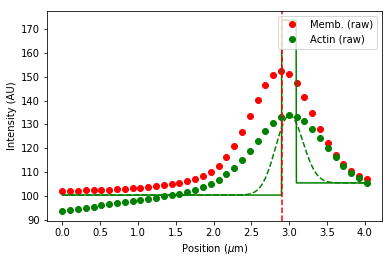

Thickness (nm), center cortex , cortical actin intensity (from fit) 196.501314325721 2.9955514609093497 173.75404873670826


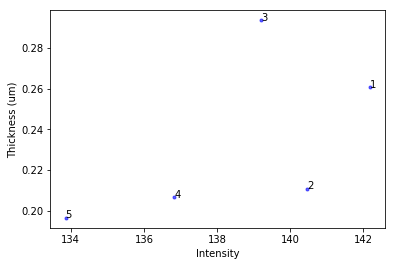

Thickness (min) 196.501314325721 nm
Thickness (median) 210.7220103506826 nm
Thickness (max) 293.61356537608003 nm
block id 6


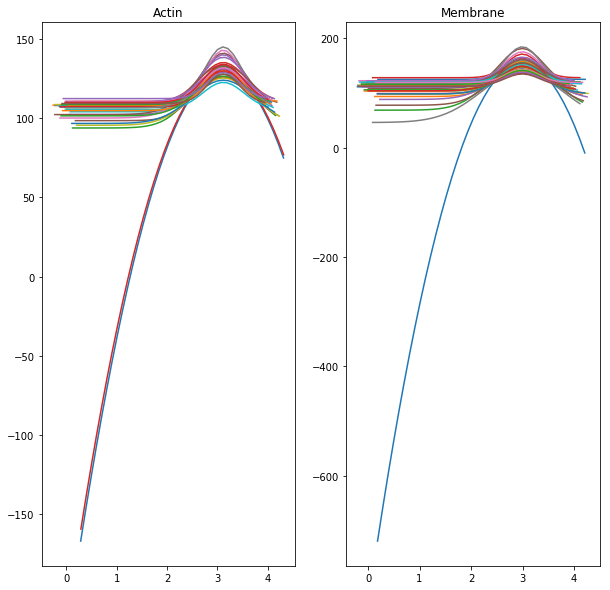

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 37.82568935   0.40743157   3.00096405 113.4946539 ]
Actin Fit: [ 25.17565848   0.44501311   3.12448755 108.15101629]


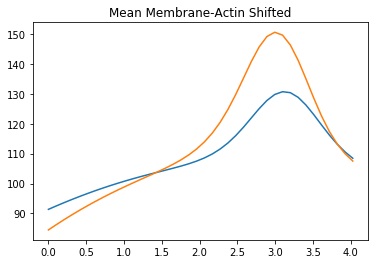

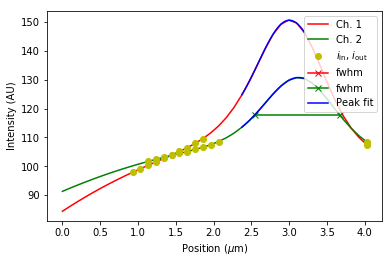

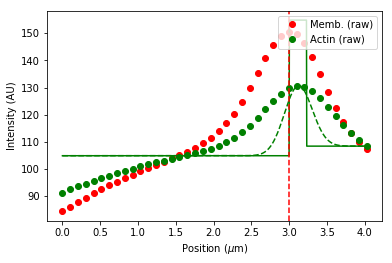

Thickness (nm), center cortex , cortical actin intensity (from fit) 228.49382221952834 3.1152109648739272 154.83576382982685


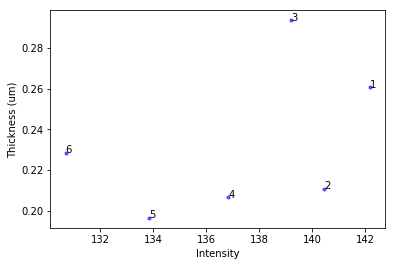

Thickness (min) 196.501314325721 nm
Thickness (median) 219.6079162851055 nm
Thickness (max) 293.61356537608003 nm
block id 7


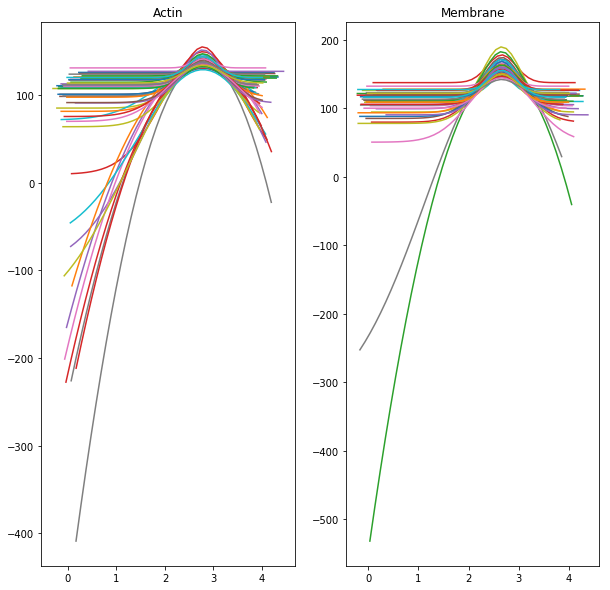

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 35.69906846   0.36352042   2.65480703 115.18896685]
Actin Fit: [ 48.28044844   0.52991883   2.80002842 100.07130222]


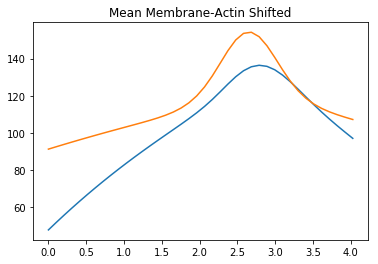

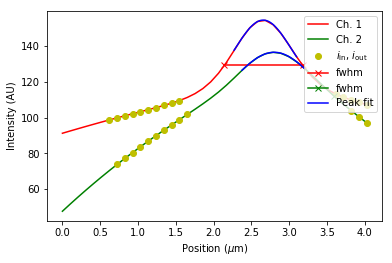

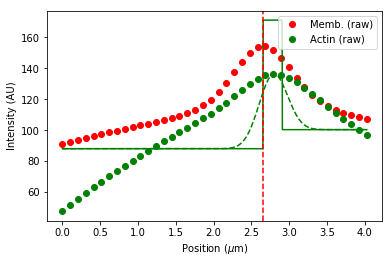

Thickness (nm), center cortex , cortical actin intensity (from fit) 253.96054829777182 2.7817873012674625 171.20960734742653


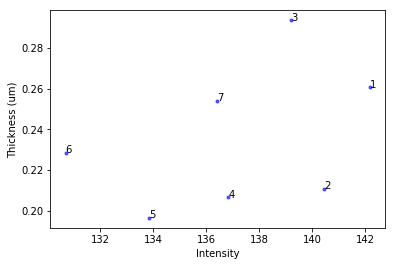

Thickness (min) 196.501314325721 nm
Thickness (median) 228.49382221952834 nm
Thickness (max) 293.61356537608003 nm
block id 8


/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


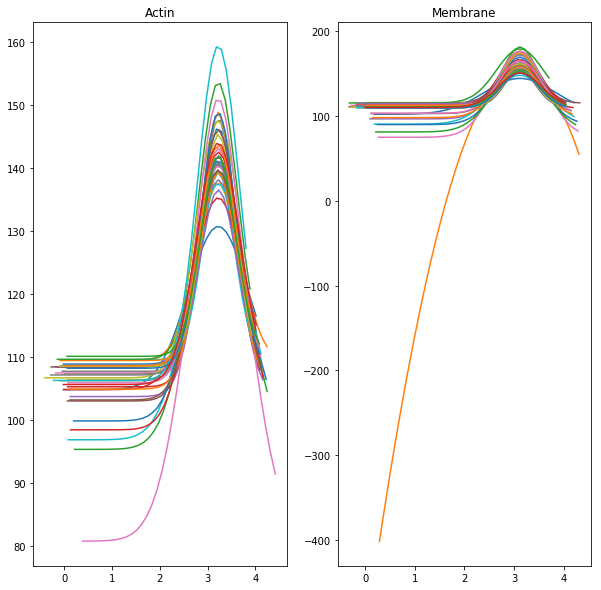

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 50.40216959   0.43420714   3.13710147 111.40718244]
Actin Fit: [ 36.80554134   0.44420904   3.2419442  107.58371151]


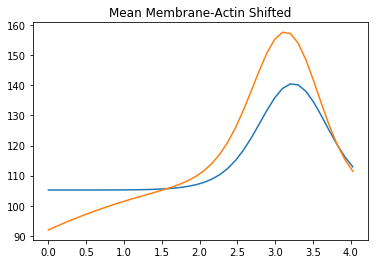

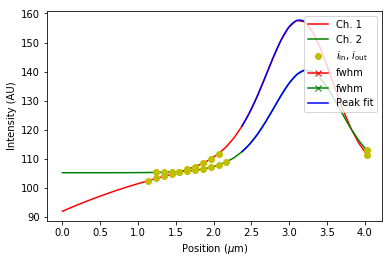

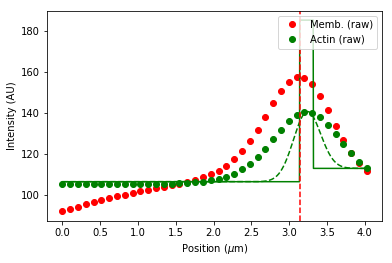

Thickness (nm), center cortex , cortical actin intensity (from fit) 182.43916860194525 3.228321053057781 185.28623378073533


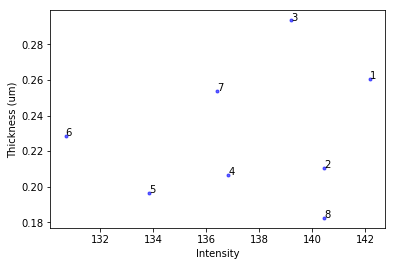

Thickness (min) 182.43916860194525 nm
Thickness (median) 219.6079162851055 nm
Thickness (max) 293.61356537608003 nm
block id 9


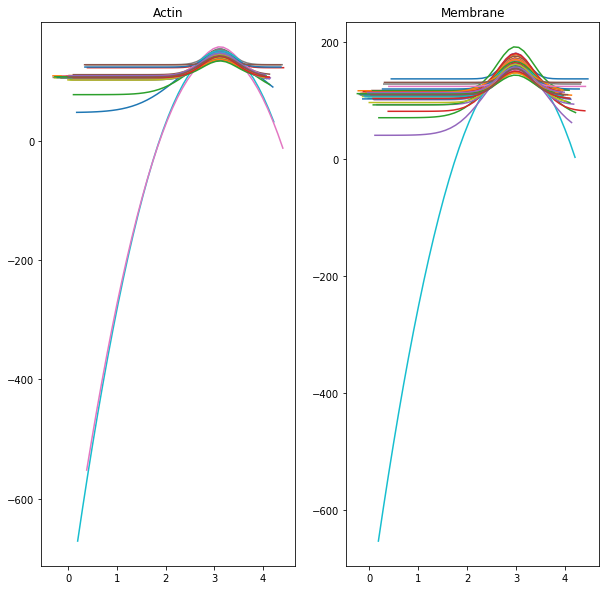

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 45.876978     0.40249788   3.01673229 111.95045994]
Actin Fit: [ 36.94868091   0.42301277   3.13074812 106.75376337]


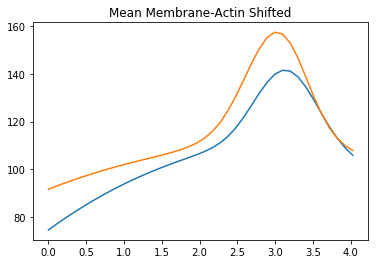

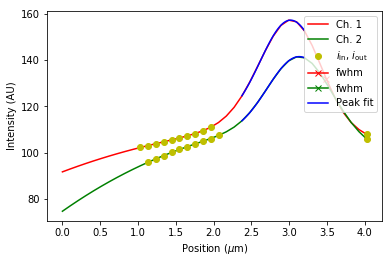

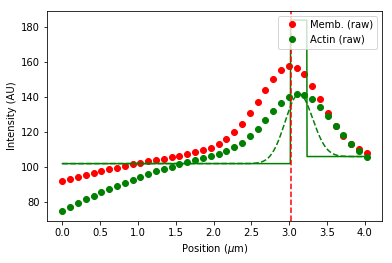

Thickness (nm), center cortex , cortical actin intensity (from fit) 214.3993358440267 3.1239319568317847 183.85506181663771


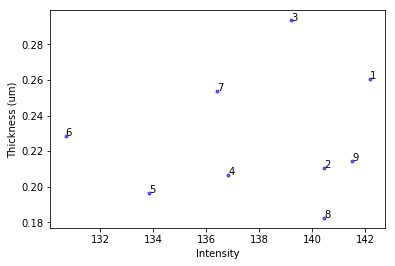

Thickness (min) 182.43916860194525 nm
Thickness (median) 214.3993358440267 nm
Thickness (max) 293.61356537608003 nm
block id 10


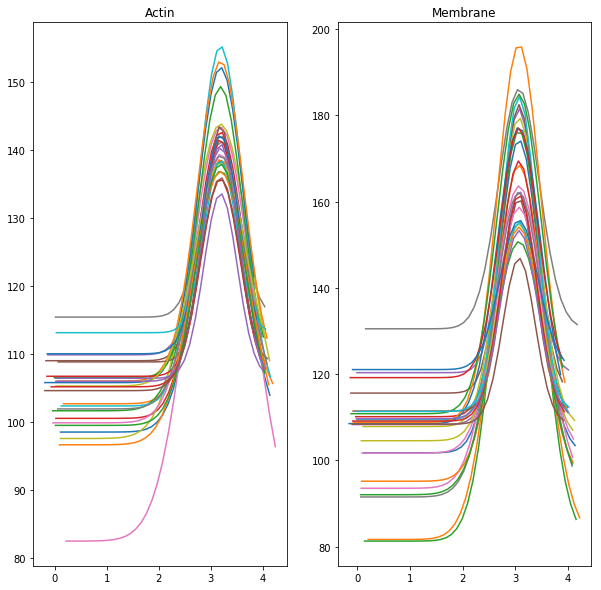

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 55.55784852   0.39510775   3.08379337 110.1324408 ]
Actin Fit: [ 37.25625468   0.43723786   3.20153518 106.37116279]


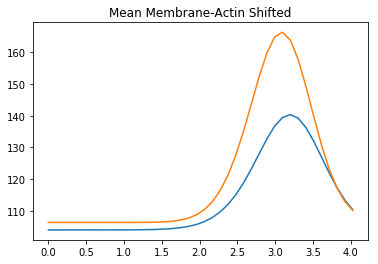

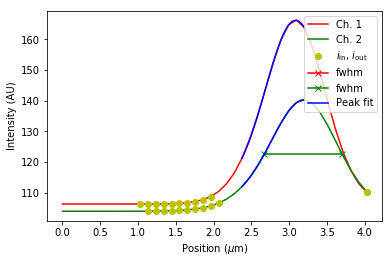

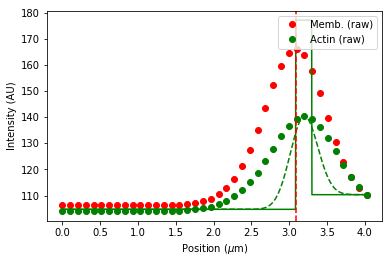

Thickness (nm), center cortex , cortical actin intensity (from fit) 213.66816028774159 3.1906274478957637 177.24296048082


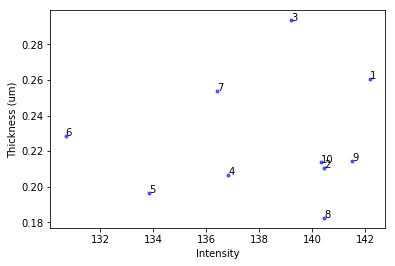

Thickness (min) 182.43916860194525 nm
Thickness (median) 214.03374806588417 nm
Thickness (max) 293.61356537608003 nm
CPU times: user 3min 13s, sys: 2.7 s, total: 3min 16s
Wall time: 3min 16s


In [4]:
%%time
#Fit all blocks

Thickness = []
Intensity = []
PeakActin = []
DataActin = []
PeakMembrane = []
DataMembrane = []
Time = []
ID = []

BlockAverageActin = []
BlockAverageMembrane = []
for i in range(0, totallength):
    
 BlockActin = []
 BlockMembrane = []
    
 print('block id', i+1) 
 currentid = i+1
 ID.append(i + 1)
 Actin = blockimageActin[i]
 Membrane = blockimageMembrane[i]
 
 StripFit(Membrane, Actin, Time_unit, Xcalibration, Fitaround, psf, inisigmaguess, showaftertime, Thickness, Intensity, PeakActin, BlockActin, PeakMembrane, BlockMembrane, BlockAverageActin,BlockAverageMembrane, Time, 0)
 Correlation_plot(Thickness, Intensity, ID)
 
 print("Thickness (min)",np.min(Thickness) *1000, "nm")
 print("Thickness (median)",np.median(Thickness) *1000, "nm")
 print("Thickness (max)",np.max(Thickness) *1000, "nm")
 
 Thickness_intensity = np.column_stack([Thickness, Intensity]) 
 
 Thickness_id = np.column_stack([Thickness, ID]) 
 

 #clear_output(wait = True)
    


In [5]:

hist, edges = np.histogram((Thickness), density=False, bins='auto')
p = figure(title="Estimated Cortex Thickness = " + str('%.5f'%np.abs(edges[np.argmax(hist)] * 1000)) + 'nm', y_axis_label='Counts',x_axis_label='Thickness(um)')
listedges = edges.tolist()
listhist = hist.tolist()
output_notebook()
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
    fill_color="#036564", line_color="#033649")
for  i in range(0,len(listhist)):
  if listhist[i] > 0:
   mytext = Label(x=listedges[i], y=listhist[i], text=str('%.4f'%listedges[i]))
   p.add_layout(mytext)
show(p)    


Loading BokehJS ...

In [6]:

master_data= []

Path(save_dir).mkdir(exist_ok = True)

for line in Thickness_id:
    master_data.append(line)
writer = csv.writer(open(save_dir + "/" + (os.path.basename(Actinimage))  +".csv", "w"))
writer.writerows(master_data)  

X: 140.69007705445972 Y:  0.22926174113410494
Standard deviation: 22.355481548262894
X: 134.4569233069172 Y:  0.22139866691268895
Standard deviation: 22.355481548262894


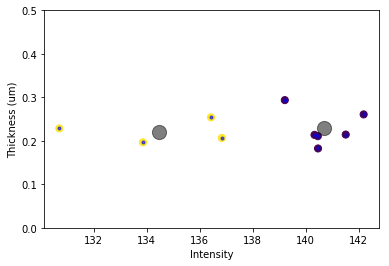

In [11]:

num_clusters = 2
show_intensity_plot(Thickness_intensity, ymin = 0, ymax = 0.5, num_clusters = num_clusters )
    
    

X: 0.22926174113410494 Y:  140.69007705445972
X: 0.22139866691268895 Y:  134.4569233069172


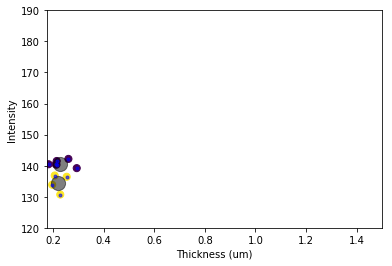

In [8]:
from sklearn.cluster import KMeans

fig, ax = plt.subplots() 
ax.plot(Thickness_intensity[:, 0], Thickness_intensity[: , 1], '.b', alpha=0.6,
        label='Inlier data')
x_min, x_max = ax.get_xlim()
ax.axis([x_min,1.5, 120, 190])
ax.set_xlabel('Thickness (um)')
ax.set_ylabel('Intensity')
X = np.column_stack([Thickness_intensity[:, 0], Thickness_intensity[: , 1]])  
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
for i in range(0, len(centers)):
     print('X:', centers[i, 0], 'Y: ', centers[i, 1])
plt.show()

/Users/aimachine/PyImage/utils/GaussFit.py:596: RuntimeWarning: invalid value encountered in double_scalars
  m_left = (self.i[self.left_index_right] - self.i[self.left_index_left]) /  (self.x[self.left_index_right] - self.x[self.left_index_left])
/Users/aimachine/PyImage/utils/GaussFit.py:612: RuntimeWarning: invalid value encountered in double_scalars
  m_right = (self.i[self.right_index_right] - self.i[self.right_index_left]) / (self.x[self.right_index_right] - self.x[self.right_index_left])


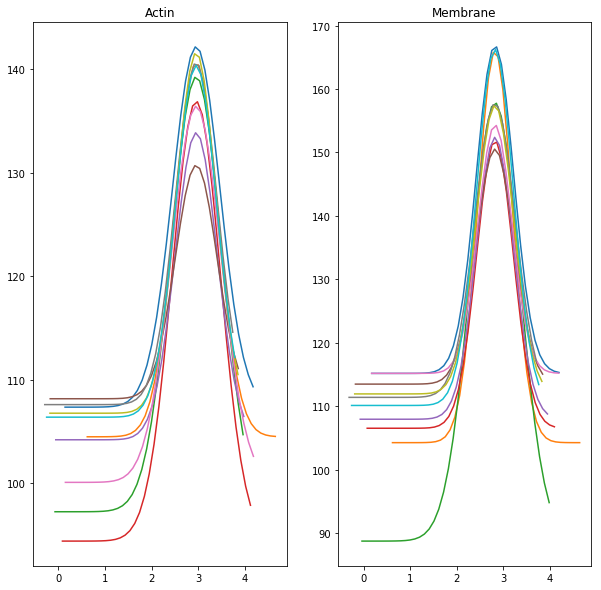

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 32.77085021   0.42221759   2.85389651 118.6069148 ]
Actin Fit: [ 29.96934165   0.48780433   2.99596811 109.63077158]


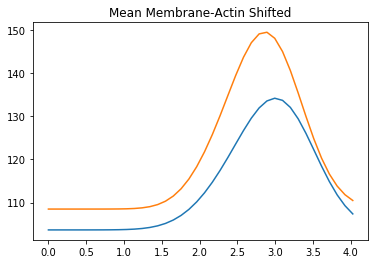

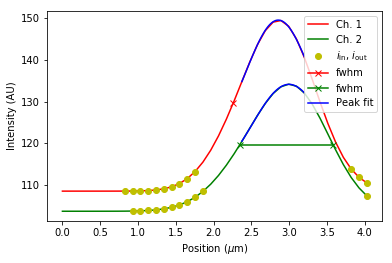

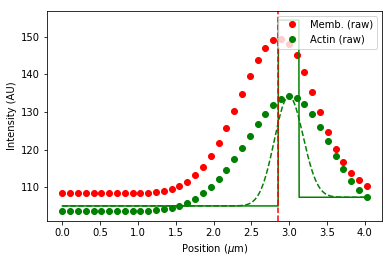

Thickness (nm), center cortex , cortical actin intensity (from fit) 274.0578622439885 2.99092544149542 154.3630041966171


In [9]:

FinalThickness = []
FinalIntensity = []
FinalTime = []
FinalShiftFit(BlockAverageActin, BlockAverageMembrane, Time_unit, Xcalibration, Fitaround
             , psf, inisigmaguess, showaftertime,FinalThickness, FinalIntensity,   FinalTime, 0)
    
    